Ссылка на опрос - https://goo.gl/forms/vO5Ls0eVJFdyhqL32

# Решающие деревья

Решающее дерево — средство поддержки принятия решений, использующееся в статистике и анализе данных для прогнозных моделей. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение. Подобные деревья решений широко используются в интеллектуальном анализе данных. Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной на основе нескольких переменных на входе.

![title](img/CART_tree_titanic_survivors.png)

In [1]:
import sklearn.datasets as datasets
import pandas as pd


from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [2]:
# устанавливаем graphviz, pydot, pydotplus
#!apt-get -qq install -y graphviz && pip install -q pydot && pip install -q pydotplus

In [3]:
import pydotplus
from IPython.core.display import display

def draw_tree(dtree):
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

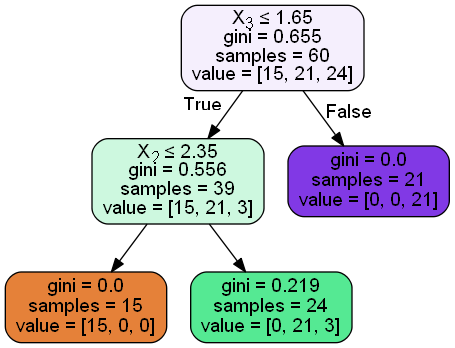

In [4]:
from sklearn.model_selection import train_test_split
# загружаем датасет iris 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.6, random_state=42)
df = None
# строим дерево глубины 2, с критерием "gini", random_state=42
dtree = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
dtree.fit(X_train, y_train)
# рисуем дерево с помощью функции draw_tree()
draw_tree(dtree)

Рассмотрим верхнюю вершину дерева:

$X_3 <= 1.65$ -- показвыает какой признак был выбран для разделения

$gini = 0.655$ -- значение критерия gini

$sample = 60$ -- количество сэмплов для разделения

$value = [15, 21, 24]$ -- количество сэмплов каждого класса


In [5]:
from sklearn.metrics import accuracy_score

y_pred = dtree.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.67%


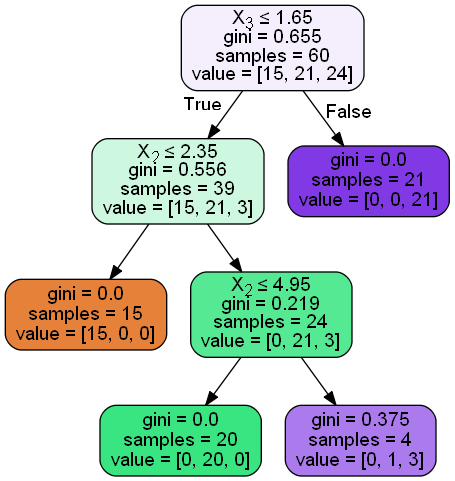

In [6]:
# построим дерево с max depth 7, "gini", random_state 42 
# какоме минимальное количество листьев max_leaf_nodes необходимо для ac >= 97%?
dtree = DecisionTreeClassifier(max_depth=7, criterion="gini", random_state=42, max_leaf_nodes=4)
dtree.fit(X_train, y_train)
draw_tree(dtree)

In [7]:
y_pred = dtree.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.78%


# Случайный лес

Random forest (с англ. — «случайный лес») — алгоритм машинного обучения, предложенный Лео Брейманом и Адель Катлер, заключающийся в использовании комитета (ансамбля) решающих деревьев. Алгоритм сочетает в себе две основные идеи: метод бэггинга Бреймана, и метод случайных подпространств, предложенный Tin Kam Ho. Алгоритм применяется для задач классификации, регрессии и кластеризации. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим.


Если вы обучите дерево решений на наборе данных, то оно сформирует некоторый набор правил, которые будут использоваться для прогнозов. Данное дерево может получиться глубоким и переобученным. Для сравнения, Random Forest случайным образом выбирает наблюдения и функции для построения нескольких деревьев решений, а затем усредняет их.


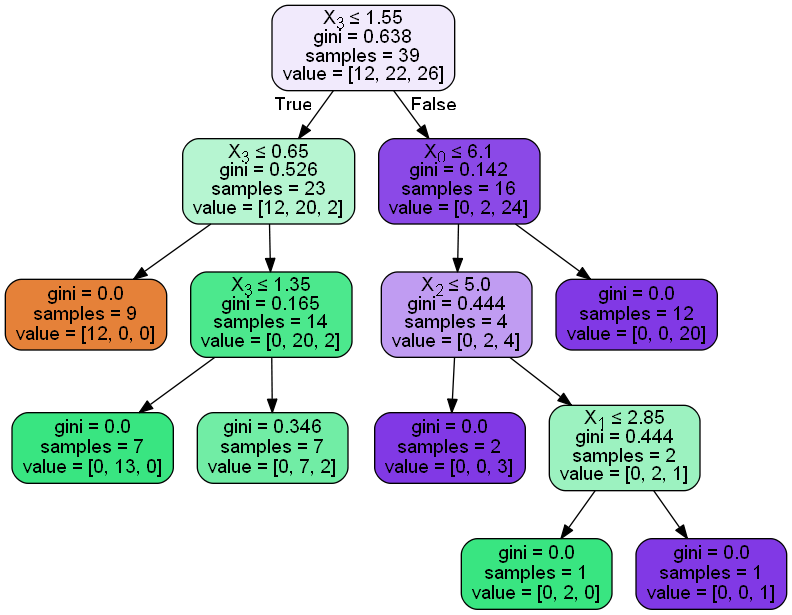

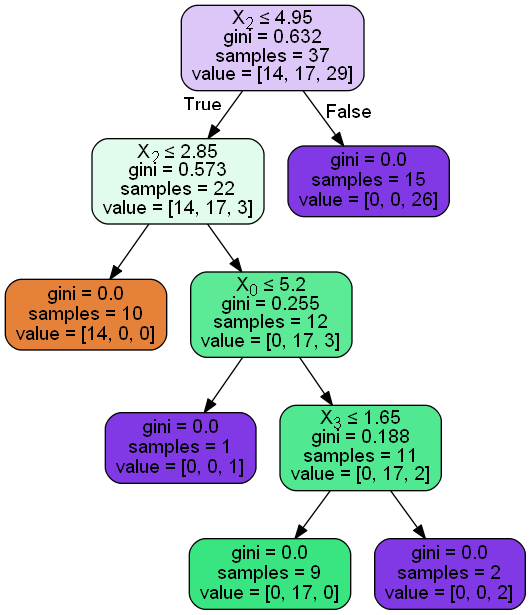

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=7,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=22, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [8]:
from sklearn.ensemble import RandomForestClassifier
# построим композицию из 2-ух деревьев
r2forest = RandomForestClassifier(n_estimators=2, max_leaf_nodes=7, random_state=42)
r2forest.fit(X_train, y_train)

for tree in list(r2forest.estimators_): 
    draw_tree(tree)
# построим композицию из 22-ти деревьев
r22forest = RandomForestClassifier(n_estimators=22, max_leaf_nodes=7, random_state=42)
r22forest.fit(X_train, y_train)


In [9]:
y_pred = r2forest.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

y_pred = r22forest.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.44%
Accuracy: 96.67%


#  Boosting

Бустинг представляет собой жадный алгоритм построения композиции алгоритмов. Основная идея заключается в том, чтобы, имея множество относительно слабых алгоритмов обучения, построить их хорошую линейную комбинацию. Он похож на бэггинг тем, что базовый алгоритм обучения фиксирован. Отличие состоит в том, что обучение базовых алгоритмов для композиции происходит итеративно, и каждый следующий алгоритм стремится компенсировать недостатки композиции всех предыдущих алгоритмов.

На примере бустинга стало ясно, что хорошим качеством могут обладать сколь угодно сложные композиции классификаторов, при условии, что они правильно настраиваются. Это развеяло существовавшие долгое время представления о том, что для повышения обобщающей способности необходимо ограничивать сложность алгоритмов. 

Впоследствии этот феномен бустинга получил теоретическое обоснование. Оказалось, что взвешенное голосование не увеличивает эффективную сложность алгоритма, а лишь сглаживает ответы базовых алгоритмов. Эффективность бустинга объясняется тем, что по мере добавления базовых алгоритмов увеличиваются отступы обучающих объектов. Причём бустинг продолжает раздвигать классы даже после достижения безошибочной классификации обучающей выборки.

Общая схема бустинга:
- Искомый ансамбль алгоритмов имеет вид $a(x) = \mbox{sign}(\sum_{t = 1}^T \alpha_t b_t(x))$, где $b_t$ - базовые алгоритмы.
- Ансамбль строится итеративно, оптимизируя на каждом шаге функционал $Q_t$, равный количеству ошибок текущей композиции на обучающей выборке.
- При добавлении слагаемого $\alpha_t b_t(x)$ в сумму, функционал $Q_t$ оптимизируется только по базовому алгоритму $b_t(x)$ и коэффициенту $\alpha_t$ при нём, все предыдущие слагаемые считаются фиксированными.
- Функционал $Q_t$ имеет вид суммы по объектам обучающей выборки пороговых функций вида $[y_i \sum_{j = 1}^t \alpha_j b_j(x_i) < 0]$, имеющих смысл "текущая композиция ошибается на объекте с номером $i$". Каждое такое слагаемое имеет вид "ступеньки" и является разрывной функцией. Для упрощения решения задачи оптимизации такая пороговая функция заменяется на непрерывно дифференцируемую оценку сверху. В итоге получается новый функционал $\hat{Q}_t \geqslant Q_t$, минимизация которого приводит к минимизации исходного функционала $Q_t$.

Используя различные аппроксимации для пороговой функции потерь $[z < 0]$, будем получать различные виды бустинга. Примеры:
- $e^{-z}$ - AdaBoost
- $\log_2(1 + e^{-z})$ - LogitBoost
- $(1 - z)^2$ - GentleBoost
- $e^{-cz(z+a)}$ - BrownBoost
- другие

Populating the interactive namespace from numpy and matplotlib


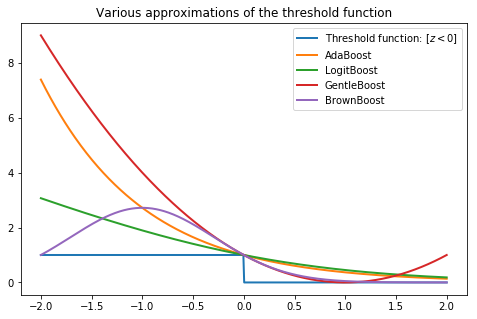

In [11]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 500)

plt.figure(figsize=(8,5))
plt.plot(x, x < 0, lw=2, label='Threshold function: $[z < 0$]')
plt.plot(x, np.exp(-x), lw=2, label='AdaBoost')
plt.plot(x, np.log2(1 + np.exp(-x)), lw=2, label='LogitBoost')
plt.plot(x, (1 - x) ** 2, lw=2, label='GentleBoost')
plt.plot(x, np.exp(-x * (x + 2)), lw=2, label='BrownBoost')
plt.title('Various approximations of the threshold function')
plt.legend(loc='best')

### Алгоритм AdaBoost

Как было сказано, алгоритм AdaBoost получается из описанной схемы, при аппроксимации пороговой функции потерь с помощью функции $e^{-z}$. Cуществует теорема (Freund, Schapire, 1996), дающая для достаточно богатых семейств базовых классификаторов явные формулы для базового алгоритма $b_t(x)$ и коэффициента $\alpha_t$ при нём, на которых достигается минимум функционала $\hat{Q}_t$. 

Сам алгоритм выглядит следующим образом:
- Инициализировать веса объектов $w_i = \frac{1}{l}, i = 1, \dots, l$.
- Для всех $t = 1, \dots, T$
    * Обучить базовый алгоритм $b_t = \arg \min_b N(b, W^l)$, где $N(b, W^l)$ есть взвешенная сумма ошибочных классификаций для $b_t$.
    * $\alpha_t = \frac{1}{2}\frac{1 - N(b_t, W^l)}{N(b_t, W^l)}$.
    * Обновить веса объектов: $w_i = w_i e^{-\alpha_t y_i b_t(x_i)}, i = 1, \dots, l$.
    * Нормировать веса объектов: $w_0 = \sum_{j = 1}^k w_j, w_i = \frac{w_i}{w_0}, i = 1, \dots, l$.
    
Таким образом, вновь добавляемый алгоритм обучается путём минимизации взвешенной частоты ошибок на обучающей выборке, а не стандартного функционала, равного частоте ошибок. Вес объекта увеличивается в $e^{\alpha_t}$ раз, когда $b_t$ допускает на нём ошибку, и уменьшается во столько же раз, когда $b_t$ правильно классифицирует этот объект. Таким образом, непосредственно перед настройкой базового алгоритма наибольший вес накапливается у тех объектов, которые чаще оказывались трудными для классификации предыдущими алгоритмами.

### Gradient boosting
Метод градиентного бустинга в некотором смысле является обобщением остальных методов бустинга, поскольку он позволяет оптимизировать произвольную дифференцируемую функцию потерь. Данный алгоритм похож на метод градиентного спуска, применяемый для решения задач оптимизации. Основная идея заключается в том, что каждый следующий добавляемый в композицию алгоритм настраивается на остатки предыдущих алгоритмов.

Пусть дана функция потерь дифференцируемая $L(F(x), y)$. Сам алгоритм выглядит следующим образом:
- Инициализация композиции константным значением $F_0(x) = \arg\min_{\alpha} \sum_{i=1}^n L(\alpha, y_i)$.
- Для всех $t = 1, \dots, T$:
    * Вычислить остатки предыдущей композиции: $r_{it} = -[\nabla_{F(x)} L(F(x_i), y_i)]_{F(x) = F_{t-1}(x)}, i = 1, \dots, n$.
    * Настроить базовый алгоритм $b_t(x)$ на полученные остатки, т.е. обучить его по выборке $\{(x_i, r_{it}), i = 1, \dots, n\}$.
    * Вычислить коэффициент $\alpha_t$ перед базовым алгоритмом $b_t(x)$ как решение следующей одномерной задачи оптимизации:
    $\alpha_t = \arg\min_\alpha \sum_{i=1}^n L(F_{t-1}(x_i) + \alpha b_t(x_i), y_i)$.
    * Добавить полученное слагаемое в композицию: $F_t(x) = F_{t-1}(x) + \alpha_t b_t(x)$.
    
Одной из возможных модификаций данного алгоритма является стохастический градиентный бустинг (SGB), который заключается в том, чтобы вычислять суммы вида $\sum_{i=1}^n$ не по всей обучающей выборке, а только по некоторой её случайной подвыборке. Такой подход является одним из способов регуляризации данного алгоритма и позволяет улучшить качество композиции, сходимость алгоритма и время обучения. 

Другой способ регуляризации - это введение параметра $\gamma$, называемого темпом обучения. При добавлении нового слагаемого в композицию, будем добавлять его, умноженное на этот коэффициент. Как правило, чем меньше темп обучения, тем лучше качество итоговой композиции.

Для задач регресси обычно использую квадратичную функцию потерь $L(x, y) = (x - y)^2$ или модуль отклонения $L(x, y) = |x - y|$.
В задаче классификации используется логистическая функция потерь, которая позволяет возвращать вероятности принадлежности объектов к классам.

Одним из наиболее популярных семейств базовых алгоритмов являются решающие деревья. Именно такой вариант градиентного бустинга <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">реализован</a> в sklearn.

## Примеры

В sklearn доступны алгоритмы AdaBoost и GradientBoosting для задач классификации и регрессии.
В качестве примера рассмотрим решение задачи восстановления одномерной регрессии с помощью <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html">GradientBoostingRegressor</a>.

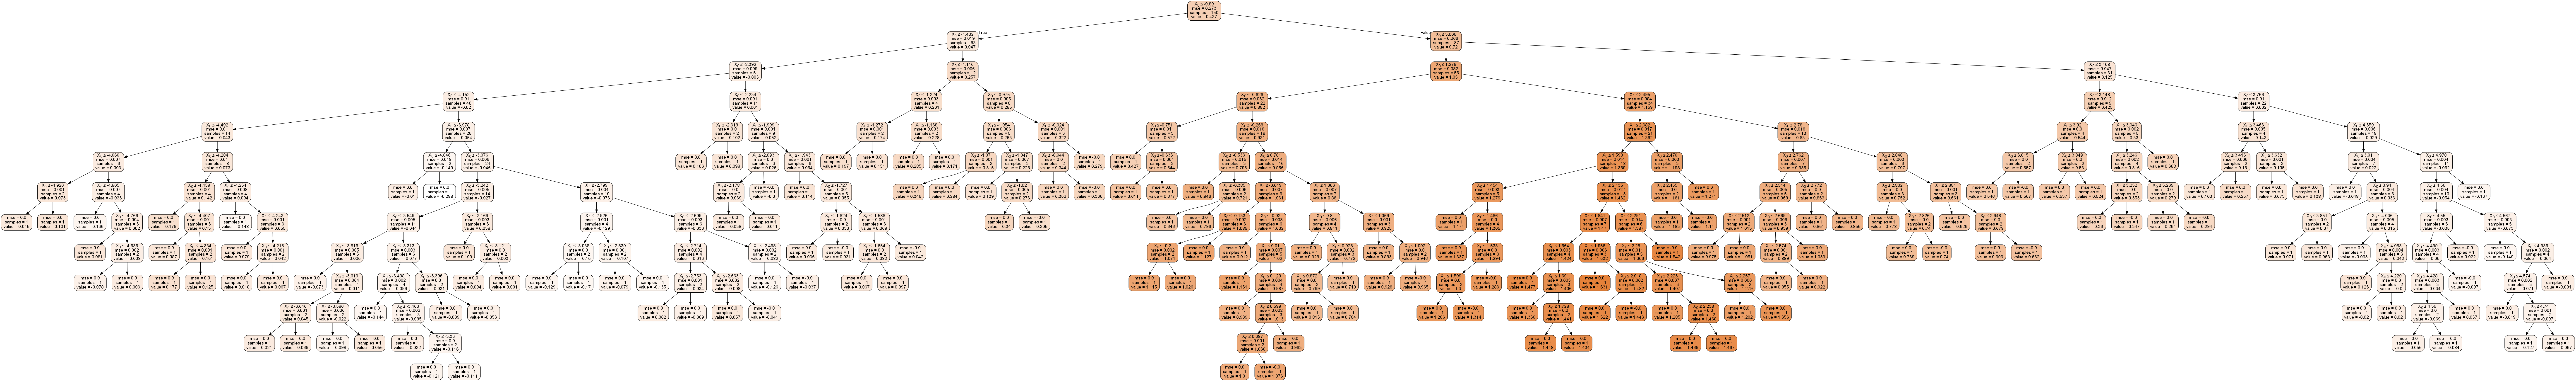

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
     
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
   # http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.ravel.html 
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) +\
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
# One decision tree regressor
dtree = DecisionTreeRegressor(random_state=42)

dtree.fit(X_train, y_train)
d_predict = dtree.predict(X_test)

# нарисуем дерево
draw_tree(dtree)


Text(0.5,1,'Boosted ensemble of decision tree regressors, MSE = 13.97')

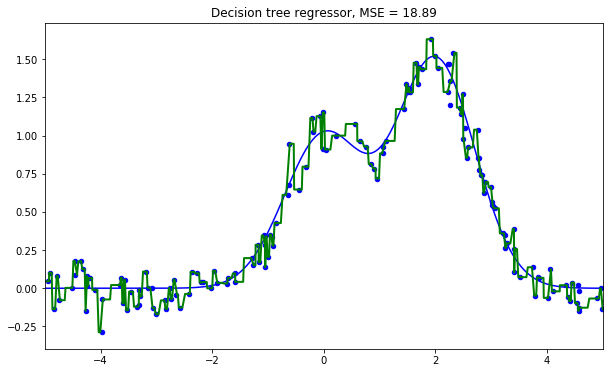

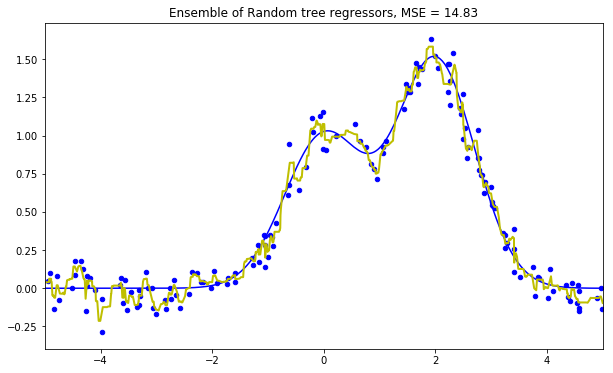

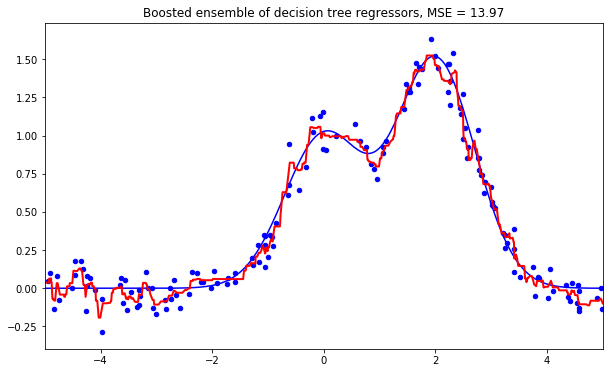

In [13]:
# построим графики
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - d_predict) ** 2))
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)
rf_predict = rforest.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Ensemble of Random tree regressors, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2))

gbtree = GradientBoostingRegressor(n_estimators=100, subsample=0.5, random_state=42)  
gbtree.fit(X_train, y_train)
gb_predict = gbtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, gb_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Boosted ensemble of decision tree regressors, MSE = %.2f" % 
          np.sum((y_test - gb_predict) ** 2))

## Полезные ссылки
- <a href="https://en.wikipedia.org/wiki/Boosting_(machine_learning)">Boosting</a>
- [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting)
- [Лекция](http://www.machinelearning.ru/wiki/images/c/cd/Voron-ML-Compositions-slides.pdf) К.В. Воронцова по композиционным методам классификации
- <a href="https://github.com/dmlc/xgboost">Xgboost</a>
- <a href="https://github.com/ChenglongChen/Kaggle_CrowdFlower">Обзор</a> решения победителя соревнования Kaggle "CrowdFlower" по предсказанию релевантности выдачи поисковика товаров. Решение на основе Xgboost


### Практика 
Один из самых важных параметров алгоритма бустинга является количество базовых моделей.<br\>
Слишком большое количество моделей может привести к переобучению, а слишком малое - к недообучению.<br\>
Как бы вы определяли оптимальное количество базовых моделей?

Рассмотрите следующий california.dat. По этой таблице предлагается построить модель, предсказывающую стоимость дома в калифорнии по остальным признакам.

* Загрузите данные и разбейте их на обучающую и контрольную выбору
* Определите оптимальное количество базовых моделей в градиентном бустинге
* Посмотрите, как ваш ответ меняется при изменении скорости обучения
* В качестве ошибки используйте MAE